# Neural Network from Scratch - Classifying A, B, C

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define 5x6 binary patterns for A, B, C
A = np.array([
[0,1,1,1,0],
[1,0,0,0,1],
[1,1,1,1,1],
[1,0,0,0,1],
[1,0,0,0,1],
[1,0,0,0,1]
]).flatten()

B = np.array([
[1,1,1,1,0],
[1,0,0,0,1],
[1,1,1,1,0],
[1,0,0,0,1],
[1,0,0,0,1],
[1,1,1,1,0]
]).flatten()

C = np.array([
[0,1,1,1,1],
[1,0,0,0,0],
[1,0,0,0,0],
[1,0,0,0,0],
[1,0,0,0,0],
[0,1,1,1,1]
]).flatten()

X = np.array([A, B, C])
y = np.array([
[1,0,0],  # A
[0,1,0],  # B
[0,0,1]   # C
])

In [2]:
# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of sigmoid
def d_sigmoid(x):
    return x * (1 - x)

# Initialize weights
np.random.seed(42)
input_size = 30
hidden_size = 10
output_size = 3
lr = 0.1

W1 = np.random.randn(input_size, hidden_size)
W2 = np.random.randn(hidden_size, output_size)

# Training
epochs = 2000
loss_history = []

for epoch in range(epochs):
    # Forward pass
    hidden = sigmoid(np.dot(X, W1))
    output = sigmoid(np.dot(hidden, W2))

    # Loss (mean squared error)
    loss = np.mean((y - output)**2)
    loss_history.append(loss)

    # Backpropagation
    error_output = y - output
    d_output = error_output * d_sigmoid(output)

    error_hidden = np.dot(d_output, W2.T)
    d_hidden = error_hidden * d_sigmoid(hidden)

    W2 += lr * np.dot(hidden.T, d_output)
    W1 += lr * np.dot(X.T, d_hidden)

print("Training complete!")

Training complete!


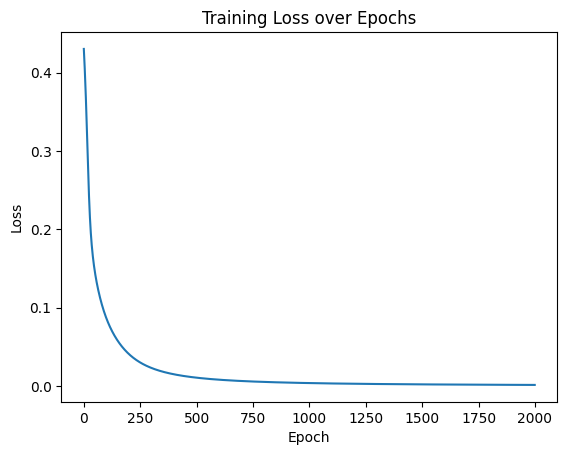

In [3]:
plt.plot(loss_history)
plt.title("Training Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

Predicted: B


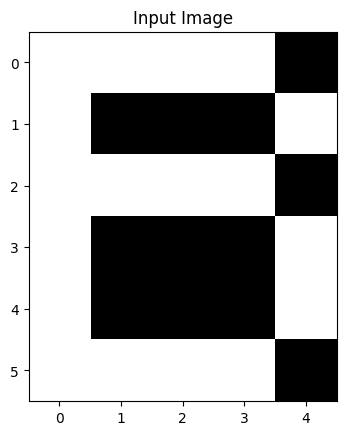

In [4]:
def predict(img):
    h = sigmoid(np.dot(img, W1))
    out = sigmoid(np.dot(h, W2))
    return np.argmax(out)

letters = ['A','B','C']

test_img = B  # Change to A, B, or C to test
print("Predicted:", letters[predict(test_img)])

plt.imshow(test_img.reshape(6,5), cmap='gray')
plt.title("Input Image")
plt.show()